This notebook is just for showcasing. The heavy lifting is in the referenced python files, which are attached

### Loading and testing

Let's load the files.

The projections have already been tested, so let's try running RRR on a small, 5 vertex graph.

In [1]:
from RRR import *
from rankProject import *
from cliqueProject import *

n = 5

H = np.array(
    [[0, 1, 1, 1, 1],
    [1, 0, 1, 0, 0],
    [1, 1, 0, 0, 0],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0]])

A = semiDefProject(np.random.rand(n, n))

print A

[[ 0.27828972  0.54527552  0.50751952  0.57112457  0.43518374]
 [ 0.54527552  0.99008533  0.53400157  0.64893321  0.03219829]
 [ 0.50751952  0.53400157  0.50409203  0.66650193  0.33443548]
 [ 0.57112457  0.64893321  0.66650193  0.82681752  0.46673994]
 [ 0.43518374  0.03219829  0.33443548  0.46673994  0.27211959]]


Let's try $k = 3$, which should yield a clique.

In [7]:
k = 3

Y, errors, sols = RRR(A, 
                    lambda x: cliqueProject(x, k, H), 
                    lambda x: rankProject(x, 1, False),
                    0.5, 1e-12, 10000, True)

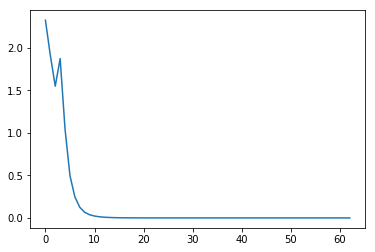

In [8]:
plt.plot(errors)
plt.show()


In [9]:
print np.round(extractClique(sols), 8)

#print sols
#print H
#print eig(sols)[0]


#print eig(rankProject(Y, 1, False))[0]

#print np.round(rankProject(Y, 1, False), 4)
#print np.round(cliqueProject(Y, 3, H), 4)

[ 1.  1.  1.  0.  0.]


As desired, the algorithm quickly found the correct solution.

If we set $k$ too high, of course, it will just thrash.

In [10]:
k = 4

Y, errors, sols = RRR(A, 
                    lambda x: cliqueProject(x, k, H), 
                    lambda x: rankProject(x, 1, False),
                    0.5, 1e-12, 10000, True)

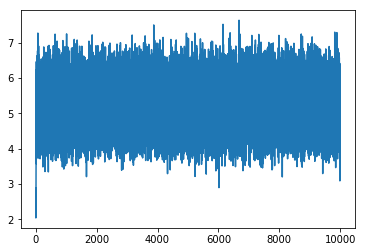

In [11]:
plt.plot(errors)
plt.show()



However, if we do have a $4$ clique, everything works out again:

In [12]:
H = np.array(
    [[0, 1, 1, 1, 1],
    [1, 0, 1, 1, 0],
    [1, 1, 0, 1, 0],
    [1, 1, 1, 0, 0],
    [1, 0, 0, 0, 0]])

k = 4

Y, errors, sols = RRR(A, 
                    lambda x: cliqueProject(x, k, H), 
                    lambda x: rankProject(x, 1, False),
                    0.5, 1e-12, 10000, True)

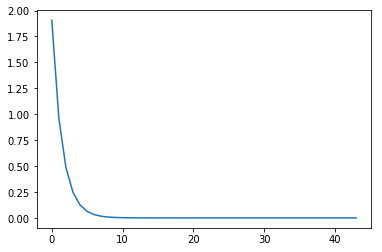

[ 1.  1.  1.  1.  0.]


In [13]:
plt.plot(errors)
plt.show()

print np.round(extractClique(sols), 8)

Fantastic! On to the real problem, which takes more than $40$ iterations.

### Loading the data, and running the code again.

First, we will load the data. Then, we will start experimenting, looking for good values of $k$.